# 💟 Lovely NumPy

> After all, you are only human.

::: {.content-visible when-format="markdown"}
## [Read full docs](https://xl0.github.io/lovely-numpy) 
:::
::: {.content-visible when-format="html"}
<h3><a href="https://github.com/xl0/lovely-numpy">Source code</a></h3>
:::

### More lovely stuff
##### Working with numbers
- [PyTorch](https://pytorch.org/): ❤️ [Lovely Tensors](https://github.com/xl0/lovely-tensors)
- [JAX](https://jax.readthedocs.io/): 💘 [Lovely `JAX`](https://github.com/xl0/lovely-jax)
- [TinyGrad](https://github.com/tinygrad/tinygrad): 🫀 [Lovely Grad](https://github.com/xl0/lovely-grad)

##### Proompting
- Log prompts with 💌 [Lovely Prompts](https://github.com/xl0/lovely-prompts)
- Better LangChain: 😎 [Proompter](https://github.com/xl0/proompter)

##### Community
- [Discord](https://discord.gg/qBaqauUWXP)

## Install

```sh
pip install lovely-numpy
```
or
```sh
conda install -c conda-forge lovely-numpy
```

## How to use

In [ ]:
# |hide
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from fastcore.test import test_eq

In [ ]:
# |hide
np.set_printoptions(precision=4)
np.set_printoptions(threshold=3, suppress=True, edgeitems=2)
numbers = np.load("mysteryman.npy").transpose(1,2,0)

How often do you find yourself debugging NumPy code? You dump your variable to the cell output, and see this:

In [ ]:
numbers

array([[[-0.3541, -0.1975, -0.6715],
        [-0.3369, -0.1975, -0.9853],
        ...,
        [-0.4739, -0.3725, -0.689 ],
        [ 2.2489,  2.4111,  2.396 ]],

       [[-0.4054, -0.25  , -0.7238],
        [-0.4226, -0.2325, -1.0724],
        ...,
        [-0.8507, -0.6702, -1.0201],
        [ 2.1633,  2.3585,  2.3263]],

       ...,

       [[-0.8507, -0.3901, -1.1944],
        [-0.7822, -0.2325, -1.4559],
        ...,
        [-1.5014, -1.2304, -1.4733],
        [ 2.1804,  2.4111,  2.4308]],

       [[-0.8335, -0.4076, -1.2293],
        [-0.8164, -0.285 , -1.5256],
        ...,
        [-1.5528, -1.2829, -1.5256],
        [ 2.1119,  2.341 ,  2.3611]]], dtype=float32)

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
from lovely_numpy import lo

## <code>Lo</code> and behold!

In [ ]:
lo(numbers)

array[196, 196, 3] f32 n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073

Better, eh?

In [ ]:
lo(numbers[1,:6,1]) # Still shows values if there are not too many.

array[6] f32 x∈[-0.408, -0.232] μ=-0.340 σ=0.075 [-0.250, -0.232, -0.338, -0.408, -0.408, -0.408]

In [ ]:
spicy = numbers[0,:12,0].copy()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
lo(spicy) # Spicy stuff

array[2, 6] f32 n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.113e+03 +Inf! -Inf! NaN!

In [ ]:
lo(np.zeros((10, 10))) # A zero array - make it obvious

array[10, 10] n=100 all_zeros

In [ ]:
lo(spicy, verbose=True)

array[2, 6] f32 n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.113e+03 +Inf! -Inf! NaN!
array([[-3540.5432,    -0.    , ...,        nan,    -0.4054],
       [   -0.4226,    -0.4911, ...,    -0.5424,    -0.5082]],
      dtype=float32)

## Going `.deeper`

In [ ]:
lo(numbers.transpose(2,1,0)).deeper

array[3, 196, 196] f32 n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  array[196, 196] f32 n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  array[196, 196] f32 n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  array[196, 196] f32 n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
# You can go deeper if you need to
lo(numbers[:3,:4]).deeper(2)

array[3, 4, 3] f32 n=36 x∈[-1.125, -0.197] μ=-0.563 σ=0.280
  array[4, 3] f32 n=12 x∈[-0.985, -0.197] μ=-0.487 σ=0.259
    array[3] f32 x∈[-0.672, -0.197] μ=-0.408 σ=0.197 [-0.354, -0.197, -0.672]
    array[3] f32 x∈[-0.985, -0.197] μ=-0.507 σ=0.343 [-0.337, -0.197, -0.985]
    array[3] f32 x∈[-0.881, -0.303] μ=-0.530 σ=0.252 [-0.405, -0.303, -0.881]
    array[3] f32 x∈[-0.776, -0.303] μ=-0.506 σ=0.199 [-0.440, -0.303, -0.776]
  array[4, 3] f32 n=12 x∈[-1.072, -0.232] μ=-0.571 σ=0.281
    array[3] f32 x∈[-0.724, -0.250] μ=-0.460 σ=0.197 [-0.405, -0.250, -0.724]
    array[3] f32 x∈[-1.072, -0.232] μ=-0.576 σ=0.360 [-0.423, -0.232, -1.072]
    array[3] f32 x∈[-0.968, -0.338] μ=-0.599 σ=0.268 [-0.491, -0.338, -0.968]
    array[3] f32 x∈[-0.968, -0.408] μ=-0.651 σ=0.235 [-0.577, -0.408, -0.968]
  array[4, 3] f32 n=12 x∈[-1.125, -0.285] μ=-0.631 σ=0.280
    array[3] f32 x∈[-0.828, -0.303] μ=-0.535 σ=0.219 [-0.474, -0.303, -0.828]
    array[3] f32 x∈[-1.125, -0.285] μ=-0.628 σ=0.360 [-0.474,

## Now in `.rgb` color

The important queston - is it our man?

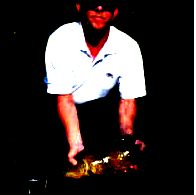

In [ ]:
lo(numbers).rgb

_Maaaaybe?_ Looks like someone normalized him.

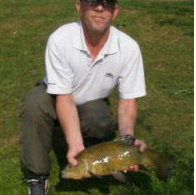

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=True) # For channel-last input format
lo(numbers).rgb(denorm=in_stats)

It's indeed our hero, the Tenchman!

## See the `.chans`

In [ ]:
# .chans will map values betwen [-1,1] to colors.
# Make our values fit into that range to avoid clipping.
mean = np.array(in_stats[0])
std = np.array(in_stats[1])
numbers_01 = (numbers*std + mean).clip(0,1)
lo(numbers_01)

array[196, 196, 3] n=115248 (0.9Mb) x∈[0., 1.000] μ=0.361 σ=0.248

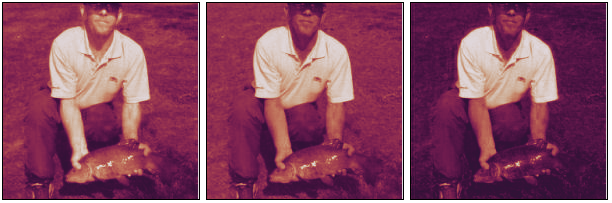

In [ ]:
lo(numbers_01).chans

## Grouping

In [ ]:
# Make 8 images with progressively higher brightness and stack them 2x2x2.
eight_images = (np.stack([numbers]*8) + np.linspace(-2, 2, 8)[:,None,None,None])
eight_images = (eight_images
                     *np.array(in_stats[1])
                     +np.array(in_stats[0])
                ).clip(0,1).reshape(2,2,2,196,196,3)

lo(eight_images)

array[2, 2, 2, 196, 196, 3] n=921984 (7.0Mb) x∈[0., 1.000] μ=0.382 σ=0.319

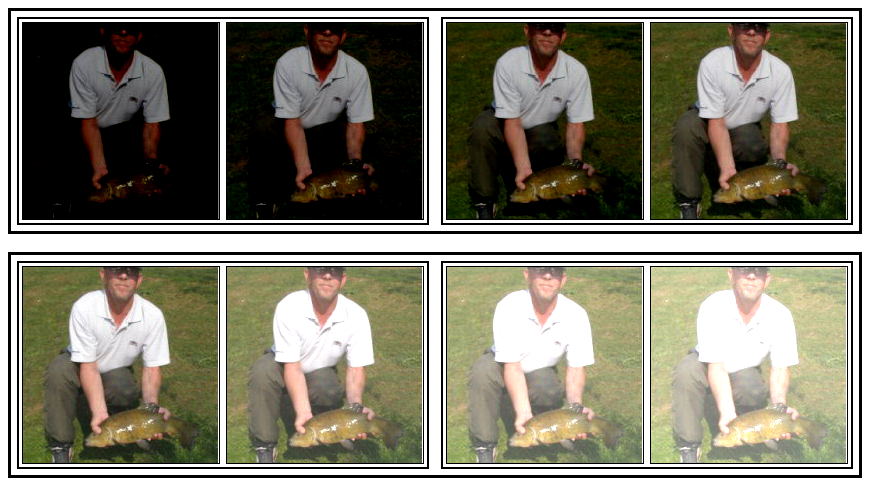

In [ ]:
lo(eight_images).rgb

## Histogram

In [ ]:
# |hide
import matplotlib

In [ ]:
# |hide
matplotlib.rcParams["svg.hashsalt"] = "1"
%config InlineBackend.print_figure_kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }}

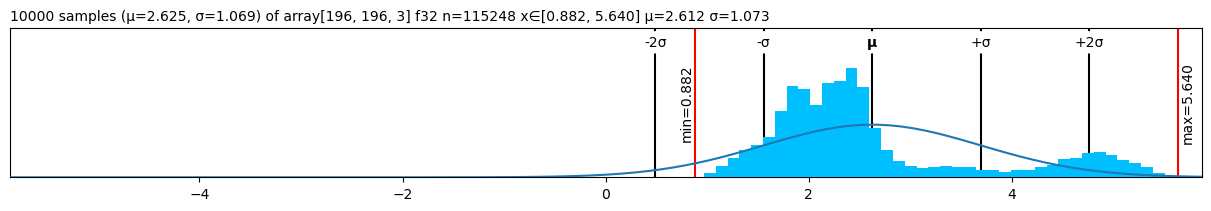

In [ ]:
lo(numbers+3).plt

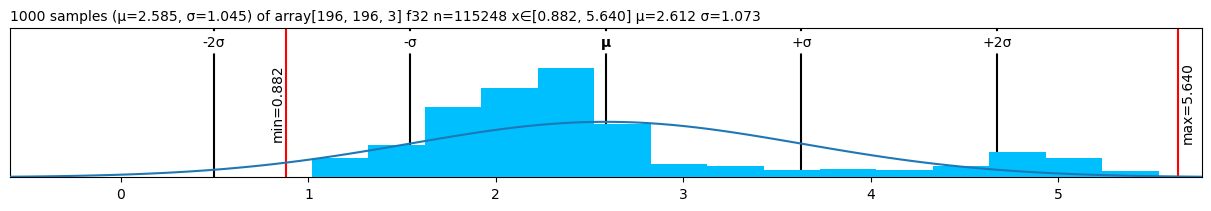

In [ ]:
lo(numbers+3).plt(center="mean", max_s=1000)

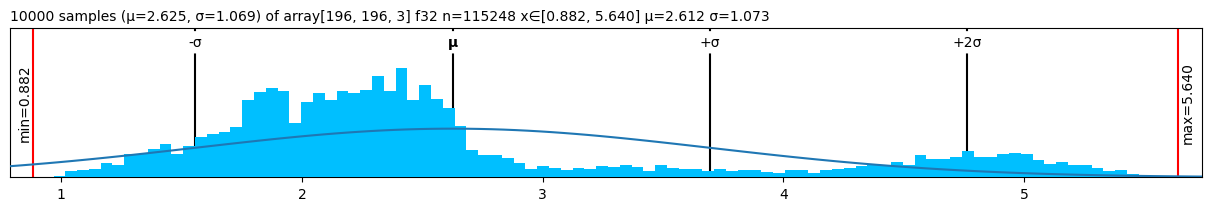

In [ ]:
lo(numbers+3).plt(center="range")

## Options | [Docs](03d_utils.config.html)

In [ ]:
from lovely_numpy import set_config, config, lovely

In [ ]:
set_config(precision=5, sci_mode=True, color=False)
lo(np.array([1.,2,np.nan]))

array[3] μ=1.50000e+00 σ=5.00000e-01 NaN! [1.00000e+00, 2.00000e+00, nan]

In [ ]:
set_config(precision=None, sci_mode=None, color=None) # None -> Reset to defaults
lo(np.array([1.,2,np.nan]))

array[3] μ=1.500 σ=0.500 NaN! [1.000, 2.000, nan]

In [ ]:
# Or with config context manager.
with config(sci_mode=True):
    print(lo(np.array([1,2,3])))

print(lo(np.array([1,2,3])))

array[3] i64 x∈[1, 3] μ=2.000e+00 σ=8.165e-01 [1, 2, 3]
array[3] i64 x∈[1, 3] μ=2.000 σ=0.816 [1, 2, 3]


## Without <code>Lo</code>

In [ ]:
from lovely_numpy import rgb, chans, plot

In [ ]:
lovely(numbers) # Returns `str`, that's why you see ''.
# Note:  lo(x) returns a wrapper object with a `__repr__` and other methods.

'array[196, 196, 3] f32 n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073'

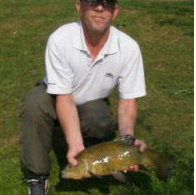

In [ ]:
rgb(numbers, denorm=in_stats)

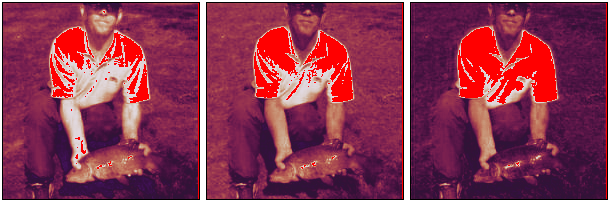

In [ ]:
chans(numbers*0.3+0.5)

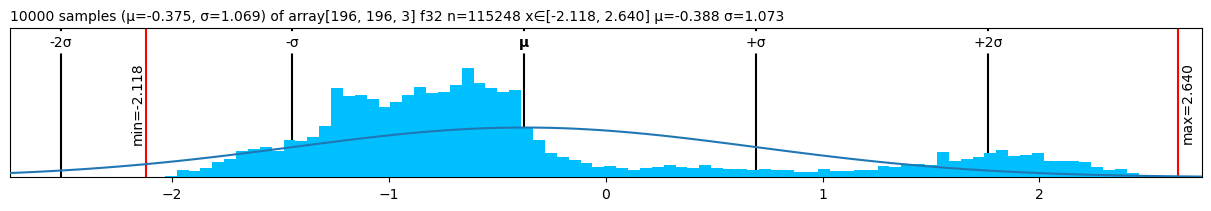

In [ ]:
plot(numbers)

## Matplotlib integration | [Docs](matplotlib.html)

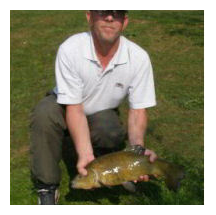

In [ ]:
lo(numbers).rgb(in_stats).fig # matplotlib figure

In [ ]:
lo(numbers).plt.fig.savefig('pretty.svg') # Save it

In [ ]:
!file pretty.svg; rm pretty.svg

pretty.svg: SVG Scalable Vector Graphics image


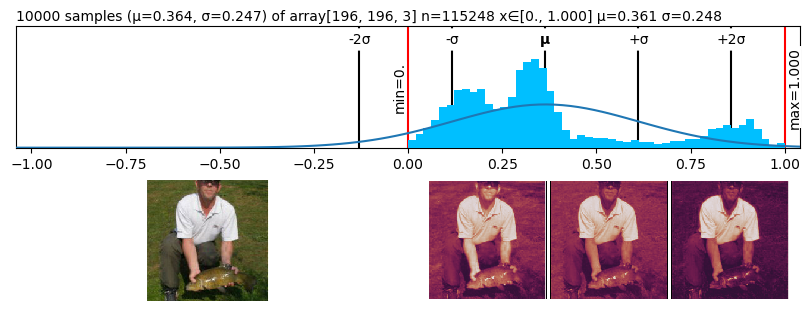

In [ ]:
fig = plt.figure(figsize=(8,3))
fig.set_constrained_layout(True)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1,1:])

ax2.set_axis_off()
ax3.set_axis_off()

lo(numbers_01).plt(ax=ax1)
lo(numbers_01).rgb(ax=ax2)
lo(numbers_01).chans(ax=ax3);
